In [4]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Causal Inference
* CausalNex: https://github.com/mckinsey/causalnex
    * structure - Directed acyclic graph structure learning: https://causalnex.readthedocs.io/en/latest/03_tutorial/01_first_tutorial.html
    * network - Bayesian network modeling: https://causalnex.readthedocs.io/en/latest/03_tutorial/01_first_tutorial.html#Fitting-the-Conditional-Distribution-of-the-Bayesian-Network
    * evaluation - Model evaluation: https://causalnex.readthedocs.io/en/latest/03_tutorial/01_first_tutorial.html#Model-Probability
    * inference - Model inference: https://causalnex.readthedocs.io/en/latest/03_tutorial/01_first_tutorial.html#Querying-Marginals
* DoWhy: https://github.com/py-why/dowhy
    * gcm - Graphical causal model-based inference: https://www.pywhy.org/dowhy/v0.9.1/user_guide/gcm_based_inference/index.html
* ananke - Causal inference with DAGs: https://ananke.readthedocs.io/en/latest/

In [11]:
sub_train = pd.read_csv('/Users/vivianyan/Desktop/NYU_Capstone_Project/Data/sub_train.csv')
sub_train.drop(columns='Unnamed: 0', inplace=True)
sub_train = pd.get_dummies(data=sub_train, columns=['BRAND','CURRENT_TERM'], dtype=int)
sub_train.head()

,Capstone_id,SUB_START,SUB_END,RESUBSCRIBER,recency,frequency,monetary_1,recency_cluster,frequency_cluster,monetary_cluster,...,churned,LTV_cluster,BRAND_CHILLSTREAM,BRAND_CINEQUEST,BRAND_LIMELIGHT,BRAND_PULSE,BRAND_RETROREEL,CURRENT_TERM_annual,CURRENT_TERM_monthly,CURRENT_TERM_weekly
0,TIA3987582,2024-02-01,2024-11-01,0,150,1,45.43,2,2,1,...,0,1,0,0,1,0,0,1,0,0
1,PNY8037927,2024-02-01,2024-04-01,0,60,1,19.98,0,2,0,...,1,0,0,0,0,0,1,0,1,0
2,SRA6677487,2024-02-29,2024-03-07,0,7,1,7.99,0,2,0,...,1,0,0,0,0,1,0,0,1,0
3,QIO2081907,2024-05-01,2024-05-17,0,16,1,9.99,0,2,0,...,1,0,0,0,0,0,1,0,1,0
4,UYU7131656,2024-04-01,2024-11-23,0,90,1,36.58,1,2,1,...,0,2,0,0,0,1,0,0,1,0


## Feature distributions among (non)churned users
Compare the distribution of different numeric features between churned (Class = 1) and non-churned (Class = 0) customers. 

**Goal**: visually identify which features might be predictive of churn.
* Blue: Class 0 (non-churned users)
* Orange: Class 1 (churned users)

/var/folders/sv/tqkwxbbd1l96g8tr45l86pmw0000gn/T/ipykernel_29873/1718850548.py:14: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
/var/folders/sv/tqkwxbbd1l96g8tr45l86pmw0000gn/T/ipykernel_29873/1718850548.py:15: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
/var/folders/sv/tqkwxbbd1l96g8tr45l86pmw0000gn/T/ipykernel_29873/1718850548.py:14: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. Th

<Figure size 640x480 with 0 Axes>

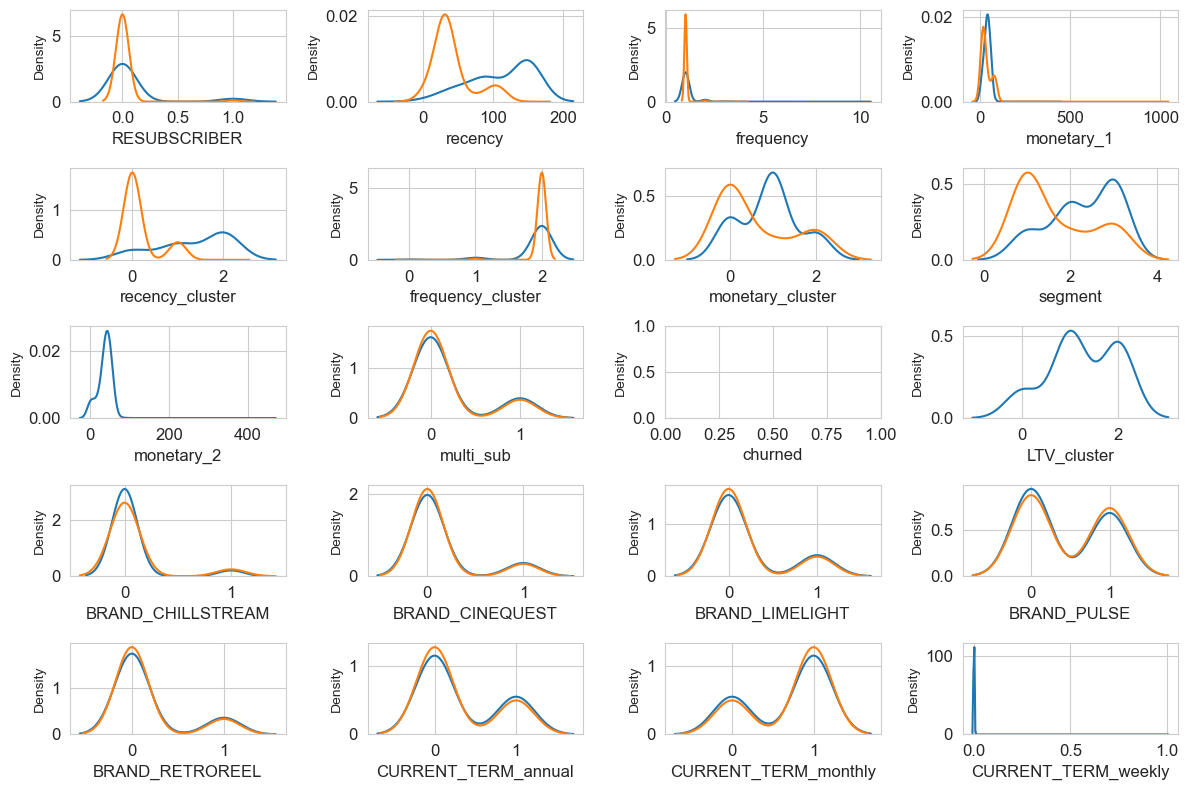

In [14]:
var = sub_train.select_dtypes(include=['float64', 'int']).columns.tolist()

i = 0
t0 = sub_train.loc[sub_train['churned'] == 0]
t1 = sub_train.loc[sub_train['churned'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(5,4,figsize=(12,8))

for feature in var:
    i += 1
    plt.subplot(5,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()
plt.show();

If the two distributions are very different for a given feature (i.e., little overlap), then that feature may be useful in predicting churn.

**Conclusion**: 
* Resubscriber: 
    * The orange peak (churned users) is heavily concentrated at 0 -> Most churned users were **not resubscribers**.
    * The blue line (non-churned users) has a noticeable bump at 1 -> A larger proportion of non-churned users are resubscribers.
* Recency & Recency cluster: churned users having **lower recent activity**
* Frequency & Frequency cluster: churned users tend to have lower frequency/retention.
* Monetary cluster: churned users tend to **spend less**
* Segment: **low-value** customers are more likely to churn.

## Correlation plot

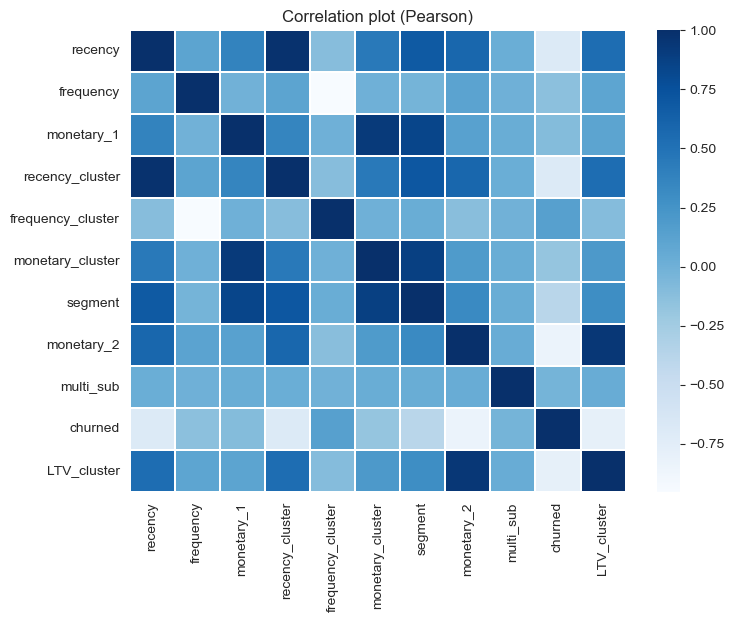

In [ ]:
sub_train = pd.read_csv('/Users/vivianyan/Desktop/NYU_Capstone_Project/Data/sub_train.csv')
sub_train.drop(columns='Unnamed: 0', inplace=True)

numericals = ['recency', 'frequency', 'monetary_1', 'recency_cluster',
       'frequency_cluster', 'monetary_cluster', 'segment', 'monetary_2',
       'multi_sub', 'churned', 'LTV_cluster']

plt.figure(figsize = (8,6))
plt.title('Correlation plot (Pearson)')
corr = sub_train[numericals].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,linewidths=.1,cmap="Blues")
plt.show();

In [27]:
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify").format(precision=2)\
    .set_table_styles(magnify())

,recency,frequency,monetary_1,recency_cluster,frequency_cluster,monetary_cluster,segment,monetary_2,multi_sub,churned,LTV_cluster
recency,1.00,0.11,0.37,0.98,-0.12,0.46,0.69,0.58,0.03,-0.69,0.54
frequency,0.11,1.00,-0.00,0.11,-0.96,0.00,-0.03,0.12,0.00,-0.13,0.10
monetary_1,0.37,-0.00,1.00,0.36,0.00,0.92,0.84,0.13,0.04,-0.10,0.11
recency_cluster,0.98,0.11,0.36,1.00,-0.12,0.45,0.70,0.58,0.02,-0.70,0.54
frequency_cluster,-0.12,-0.96,0.00,-0.12,1.00,0.00,0.03,-0.12,-0.01,0.14,-0.10
monetary_cluster,0.46,0.00,0.92,0.45,0.00,1.00,0.88,0.19,0.03,-0.18,0.20
segment,0.69,-0.03,0.84,0.70,0.03,0.88,1.00,0.32,0.03,-0.38,0.29
monetary_2,0.58,0.12,0.13,0.58,-0.12,0.19,0.32,1.00,0.04,-0.84,0.95
multi_sub,0.03,0.00,0.04,0.02,-0.01,0.03,0.03,0.04,1.00,-0.03,0.04
churned,-0.69,-0.13,-0.10,-0.70,0.14,-0.18,-0.38,-0.84,-0.03,1.00,-0.79


# Causal discovery & visualization

In [40]:
!pip install pandas numpy causalml dowhy econml scikit-learn matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 18.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Using cached cloudpickle-3.1.1-py3-none-any.whl.metadata (7.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 37.3 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.7 MB/s eta 0:00:00
Using cached cloudpickle-3.1.1-py3-none-any.whl (20 kB)
  Created wheel for econml: filename=econml-0.15.1-cp310-cp310-macosx_10_15_x86_64.whl size=1993983 sha256=850b5648a1ca1ce139e12cf2d1b2da8bd62804ac9952588e4555b1650cdeb370
  Stored in directory: /Users/vivianyan/Library/Caches/pip/wheels/c1/15/97/80e9f0522c746751235d10e1abcbdedfe7970cb6c62ef8ff45
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=2455

## Load and preprocess data

In [51]:
sub_train = pd.read_csv('/Users/vivianyan/Desktop/NYU_Capstone_Project/Data/sub_train.csv')
sub_train.drop(columns='Unnamed: 0', inplace=True)
demo = pd.read_csv('/Users/vivianyan/Desktop/NYU_Capstone_Project/Data/demo_data.csv')
df = sub_train.merge(demo, on='Capstone_id', how='left')
df['Gender'] = df['Gender'].replace({
    'Male': '0', 'Female':'1', 'Other':'2'})
df.head()

,Capstone_id,SUB_START,SUB_END,BRAND,CURRENT_TERM,RESUBSCRIBER,recency,frequency,monetary_1,recency_cluster,...,segment,monetary_2,multi_sub,churned,LTV_cluster,Age,Gender,Location,Email,Income
0,TIA3987582,2024-02-01,2024-11-01,LIMELIGHT,annual,0,150,1,45.43,2,...,3,37.56,1,0,1,43,0,East Ashleyton,ynicholson@example.com,44989
1,PNY8037927,2024-02-01,2024-04-01,RETROREEL,monthly,0,60,1,19.98,0,...,1,0.00,0,1,0,55,1,North Timothy,martinlouis@example.com,75900
2,SRA6677487,2024-02-29,2024-03-07,PULSE,monthly,0,7,1,7.99,0,...,1,0.00,0,1,0,49,0,Monicaport,kathryn47@example.net,62961
3,QIO2081907,2024-05-01,2024-05-17,RETROREEL,monthly,0,16,1,9.99,0,...,1,0.00,0,1,0,77,1,West James,royfisher@example.org,58409
4,UYU7131656,2024-04-01,2024-11-23,PULSE,monthly,0,90,1,36.58,1,...,2,59.34,0,0,2,75,0,Millerstad,brownryan@example.net,87309


## Use causal inference model
* Option A: Using CausalML (Meta-learners: e.g., T-Learner, X-Learner)
* Option B: Using DoWhy (Structural Causal Models)
* Option C: Using EconML (Double Machine Learning)
### CausalML
#### Resubscriber on churn

In [104]:
from sklearn.preprocessing import StandardScaler
import numpy as np

numerical_features = ['recency', 'frequency', 'monetary_1', 'Age', 'Income']
categorical_features = ['multi_sub', 'segment', 'Gender']
scaler = StandardScaler()
X_scaled_num = scaler.fit_transform(df[numerical_features])
X_final = np.hstack((X_scaled_num, df[categorical_features].values))
X = pd.DataFrame(X_final, columns=numerical_features + categorical_features)

T = df['RESUBSCRIBER']
print("Treatment distribution (RESUBSCRIBER):")
print(T.value_counts())

Y = df['churned']
print("\nChurn distribution:")
print(Y.value_counts())

Treatment distribution (RESUBSCRIBER):
RESUBSCRIBER
0    64770
1     2850
Name: count, dtype: int64

Churn distribution:
churned
1    34105
0    33515
Name: count, dtype: int64


**Note:**
* The model is trying to fit a logistic/linear regression and couldn’t converge to a solution within the default number of iterations (100 by default), probably because:
    * Highly collinear features (e.g., monetary_1 and monetary_2 being correlated),
    * Large feature values (e.g., income in the tens of thousands),
    * Poor feature scaling, especially if you’re mixing values like Age and Income.
    
**Solution:**
* Standardize features
* Set a higher `max_iter` if using LogisticRegression
* Swithc to a tree-based model: XGBoost or RandomForest

In [105]:
from causalml.inference.meta import BaseSClassifier
from xgboost import XGBClassifier

# Train causal inference model (X-Learner)
s_learner = BaseSClassifier(learner=XGBClassifier(eval_metric='logloss'))
s_learner.fit(X=X, treatment=T, y=Y)

# Estimate individual treatment effects (ITEs)
te = s_learner.predict(X)
df['estimated_treatment_effect'] = te
df.head()

,Capstone_id,SUB_START,SUB_END,BRAND,CURRENT_TERM,RESUBSCRIBER,recency,frequency,monetary_1,recency_cluster,...,monetary_2,multi_sub,churned,LTV_cluster,Age,Gender,Location,Email,Income,estimated_treatment_effect
0,TIA3987582,2024-02-01,2024-11-01,LIMELIGHT,annual,0,150,1,45.43,2,...,37.56,1,0,1,43,0,East Ashleyton,ynicholson@example.com,44989,-0.000009
1,PNY8037927,2024-02-01,2024-04-01,RETROREEL,monthly,0,60,1,19.98,0,...,0.00,0,1,0,55,1,North Timothy,martinlouis@example.com,75900,-0.477466
2,SRA6677487,2024-02-29,2024-03-07,PULSE,monthly,0,7,1,7.99,0,...,0.00,0,1,0,49,0,Monicaport,kathryn47@example.net,62961,-0.000961
3,QIO2081907,2024-05-01,2024-05-17,RETROREEL,monthly,0,16,1,9.99,0,...,0.00,0,1,0,77,1,West James,royfisher@example.org,58409,0.013086
4,UYU7131656,2024-04-01,2024-11-23,PULSE,monthly,0,90,1,36.58,1,...,59.34,0,0,2,75,0,Millerstad,brownryan@example.net,87309,-0.000093


      Capstone_id  estimated_treatment_effect  churned
7742   TOX3234927                    0.619224        1
42884  SMN0160093                    0.595633        0
18277  PTL0212975                    0.587363        0
20697  IUM6458267                    0.580106        0
59898  OHM6656173                    0.576261        0
44189  VUB3038659                    0.563041        0
35415  TQN8257473                    0.562724        0
10343  WJY1483666                    0.561927        1
3684   LXZ3765445                    0.550437        0
11662  WXR7870508                    0.539530        1


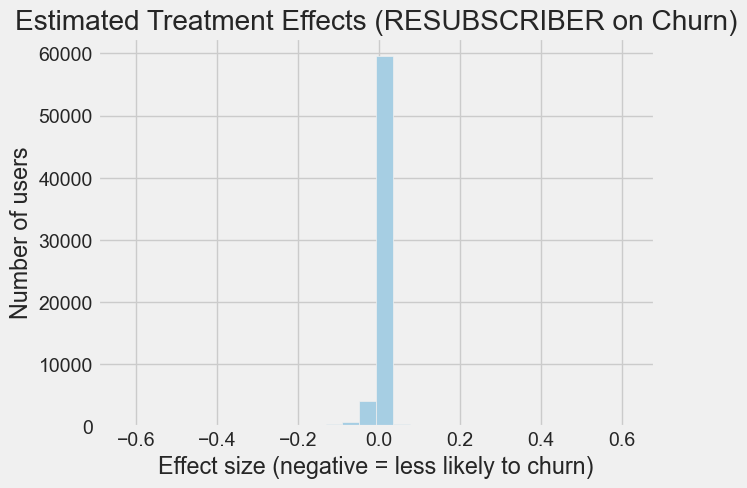

In [106]:
# Top customers most likely to benefit from RESUBSCRIBER treatment
top_positive = df.sort_values('estimated_treatment_effect', ascending=False).head(10)
print(top_positive[['Capstone_id', 'estimated_treatment_effect', 'churned']])

# Histogram of treatment effects
plt.hist(df['estimated_treatment_effect'], bins=30)
plt.title("Estimated Treatment Effects (RESUBSCRIBER on Churn)")
plt.xlabel("Effect size (negative = less likely to churn)")
plt.ylabel("Number of users")
plt.show()

**Note:**
This histogram is showing the estimated individual treatment effects (ITEs) of being a RESUBSCRIBER on churn — specifically, how much each user’s likelihood of churning is impacted causally by being a resubscriber.
* X-axis = Treatment effect size
    * Negative values → treatment (being a RESUBSCRIBER) reduced the likelihood of churn
    * Positive values → treatment increased churn risk
    * 0 → no estimated effect
* Y-axis = Number of users in that effect range

**Conclusion:**
The treatment (RESUBSCRIBER) has little to no causal effect on churn. Maybe being a RESUBSCRIBER doesn’t actually influence whether people churn — it could be more of a symptom than a cause.

In [107]:
print('Segment Analysis')
print(df.groupby('segment')['estimated_treatment_effect'].mean())

print('\nLTV Analysis')
print(df.groupby('LTV_cluster')['estimated_treatment_effect'].mean())

Segment Analysis
segment
1   -0.006803
2   -0.015199
3   -0.000376
Name: estimated_treatment_effect, dtype: float64

LTV Analysis
LTV_cluster
0   -0.010338
1   -0.001982
2   -0.000939
Name: estimated_treatment_effect, dtype: float64


#### Multi-sub on churn
"What is the causal effect of having multiple subscriptions (multi_sub) on churn?"
This asks: "Does having multiple subscriptions reduce churn (retention benefit)?"

In [108]:
sub_train.columns

Index(['Capstone_id', 'SUB_START', 'SUB_END', 'BRAND', 'CURRENT_TERM',
       'RESUBSCRIBER', 'recency', 'frequency', 'monetary_1', 'recency_cluster',
       'frequency_cluster', 'monetary_cluster', 'segment', 'monetary_2',
       'multi_sub', 'churned', 'LTV_cluster'],
      dtype='object')

In [109]:
numerical_features = ['recency', 'frequency', 'monetary_1', 'Age', 'Income']
categorical_features = ['RESUBSCRIBER', 'segment', 'Gender']
scaler = StandardScaler()
X_scaled_num = scaler.fit_transform(df[numerical_features])
X_final = np.hstack((X_scaled_num, df[categorical_features].values))
X = pd.DataFrame(X_final, columns=numerical_features + categorical_features)

T = df['multi_sub']  # new treatment
print("Treatment distribution (Multi-sub):")
print(T.value_counts())

Y = df['churned']
print("\nChurn distribution:")
print(Y.value_counts())

Treatment distribution (Multi-sub):
multi_sub
0    55105
1    12515
Name: count, dtype: int64

Churn distribution:
churned
1    34105
0    33515
Name: count, dtype: int64


In [110]:
s_learner = BaseSClassifier(learner=XGBClassifier(eval_metric='logloss'))
s_learner.fit(X=X, treatment=T, y=Y)

df['estimated_treatment_effect'] = s_learner.predict(X)
df.head()

,Capstone_id,SUB_START,SUB_END,BRAND,CURRENT_TERM,RESUBSCRIBER,recency,frequency,monetary_1,recency_cluster,...,monetary_2,multi_sub,churned,LTV_cluster,Age,Gender,Location,Email,Income,estimated_treatment_effect
0,TIA3987582,2024-02-01,2024-11-01,LIMELIGHT,annual,0,150,1,45.43,2,...,37.56,1,0,1,43,0,East Ashleyton,ynicholson@example.com,44989,0.000005
1,PNY8037927,2024-02-01,2024-04-01,RETROREEL,monthly,0,60,1,19.98,0,...,0.00,0,1,0,55,1,North Timothy,martinlouis@example.com,75900,-0.016629
2,SRA6677487,2024-02-29,2024-03-07,PULSE,monthly,0,7,1,7.99,0,...,0.00,0,1,0,49,0,Monicaport,kathryn47@example.net,62961,0.000280
3,QIO2081907,2024-05-01,2024-05-17,RETROREEL,monthly,0,16,1,9.99,0,...,0.00,0,1,0,77,1,West James,royfisher@example.org,58409,0.005339
4,UYU7131656,2024-04-01,2024-11-23,PULSE,monthly,0,90,1,36.58,1,...,59.34,0,0,2,75,0,Millerstad,brownryan@example.net,87309,0.001030


      Capstone_id  estimated_treatment_effect  churned
24338  XMZ4635668                    0.280248        1
52609  OVY1011294                    0.249831        0
48098  SBK4081499                    0.225644        0
33881  LQC7258670                    0.223991        0
7309   KWH7959719                    0.214157        1
52805  ZVH5272953                    0.204116        1
50209  NFZ0840050                    0.199617        0
62425  IVL3178258                    0.197132        0
16607  TDG9962786                    0.194984        0
29590  UVN0617674                    0.191748        0


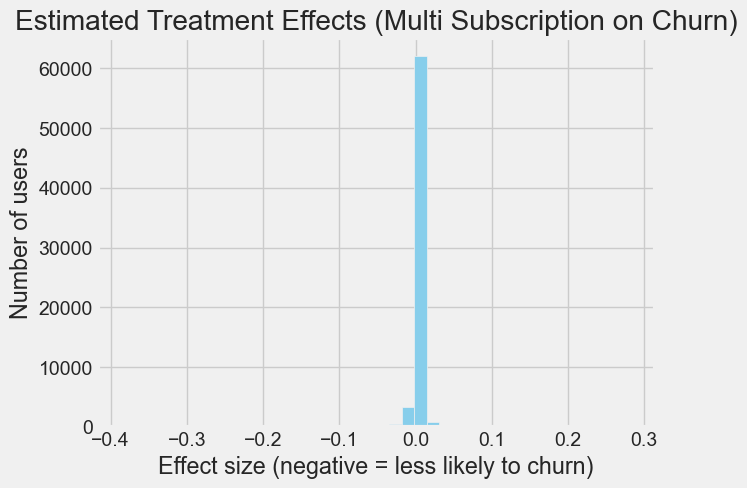

In [111]:
top_positive = df.sort_values('estimated_treatment_effect', ascending=False).head(10)
print(top_positive[['Capstone_id', 'estimated_treatment_effect', 'churned']])

plt.hist(df['estimated_treatment_effect'], bins=40, color='skyblue')
plt.title("Estimated Treatment Effects (Multi Subscription on Churn)")
plt.xlabel("Effect size (negative = less likely to churn)")
plt.ylabel("Number of users")
plt.show()

**Conclusion:**
Multi-subscription status is not a strong causal factor in churn — or at least not alone.
It may correlate with churn (more loyal users might have multiple subs), but it does not cause churn to reduce/increase measurably.

In [112]:
print('Segment Analysis')
print(df.groupby('segment')['estimated_treatment_effect'].mean())

print('\nLTV Analysis')
print(df.groupby('LTV_cluster')['estimated_treatment_effect'].mean())

Segment Analysis
segment
1   -0.001193
2    0.001787
3    0.000464
Name: estimated_treatment_effect, dtype: float64

LTV Analysis
LTV_cluster
0   -0.000010
1    0.000544
2    0.000207
Name: estimated_treatment_effect, dtype: float64


### EconML
#### Segment on churn
Move into multi-valued treatment causal inference, while this is not directly supported by classic binary T/C causal learners (like S-learner, T-learner, or X-learner). Alternatively:
* Use EconML’s DRLearner or CausalForestDML with Categorical Treatment (Experimental)

In [114]:
numerical_features = ['recency', 'frequency', 'monetary_1', 'Age', 'Income']
categorical_features = ['RESUBSCRIBER', 'multi_sub', 'Gender']
scaler = StandardScaler()
X_scaled_num = scaler.fit_transform(df[numerical_features])
X_final = np.hstack((X_scaled_num, df[categorical_features].values))
X = pd.DataFrame(X_final, columns=numerical_features + categorical_features)

T = df['segment']  # this stays multiclass
print("Treatment distribution (Segment):")
print(T.value_counts())

Y = df['churned']
print("\nChurn distribution:")
print(Y.value_counts())

Treatment distribution (Segment):
segment
1    26109
3    24447
2    17064
Name: count, dtype: int64

Churn distribution:
churned
1    34105
0    33515
Name: count, dtype: int64


In [121]:
from econml.dr import DRLearner
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

model = DRLearner(
    model_regression=RandomForestRegressor(),
    model_propensity=RandomForestClassifier(),
    model_final=RandomForestRegressor()
)
model.fit(Y, T, X=X)

# Get effect of low-value vs segment high-value
te_seg1_vs_seg3 = model.effect(X, T0=1, T1=3)
df['low_vs_mid_effect'] = model.effect(X, T0=1, T1=2)
df['low_vs_high_effect'] = model.effect(X, T0=1, T1=3)
df['mid_vs_high_effect'] = model.effect(X, T0=2, T1=3)
df.head()

,Capstone_id,SUB_START,SUB_END,BRAND,CURRENT_TERM,RESUBSCRIBER,recency,frequency,monetary_1,recency_cluster,...,LTV_cluster,Age,Gender,Location,Email,Income,estimated_treatment_effect,low_vs_high_effect,low_vs_mid_effect,mid_vs_high_effect
0,TIA3987582,2024-02-01,2024-11-01,LIMELIGHT,annual,0,150,1,45.43,2,...,1,43,0,East Ashleyton,ynicholson@example.com,44989,0.000005,0.0000,0.0000,0.0000
1,PNY8037927,2024-02-01,2024-04-01,RETROREEL,monthly,0,60,1,19.98,0,...,0,55,1,North Timothy,martinlouis@example.com,75900,-0.016629,0.0000,0.0000,0.0000
2,SRA6677487,2024-02-29,2024-03-07,PULSE,monthly,0,7,1,7.99,0,...,0,49,0,Monicaport,kathryn47@example.net,62961,0.000280,-0.0003,-0.0761,0.0758
3,QIO2081907,2024-05-01,2024-05-17,RETROREEL,monthly,0,16,1,9.99,0,...,0,77,1,West James,royfisher@example.org,58409,0.005339,-0.0049,-0.0370,0.0321
4,UYU7131656,2024-04-01,2024-11-23,PULSE,monthly,0,90,1,36.58,1,...,2,75,0,Millerstad,brownryan@example.net,87309,0.001030,0.0021,-0.0063,0.0084


      Capstone_id  estimated_treatment_effect  churned
24338  XMZ4635668                    0.280248        1
52609  OVY1011294                    0.249831        0
48098  SBK4081499                    0.225644        0
33881  LQC7258670                    0.223991        0
7309   KWH7959719                    0.214157        1
52805  ZVH5272953                    0.204116        1
50209  NFZ0840050                    0.199617        0
62425  IVL3178258                    0.197132        0
16607  TDG9962786                    0.194984        0
29590  UVN0617674                    0.191748        0


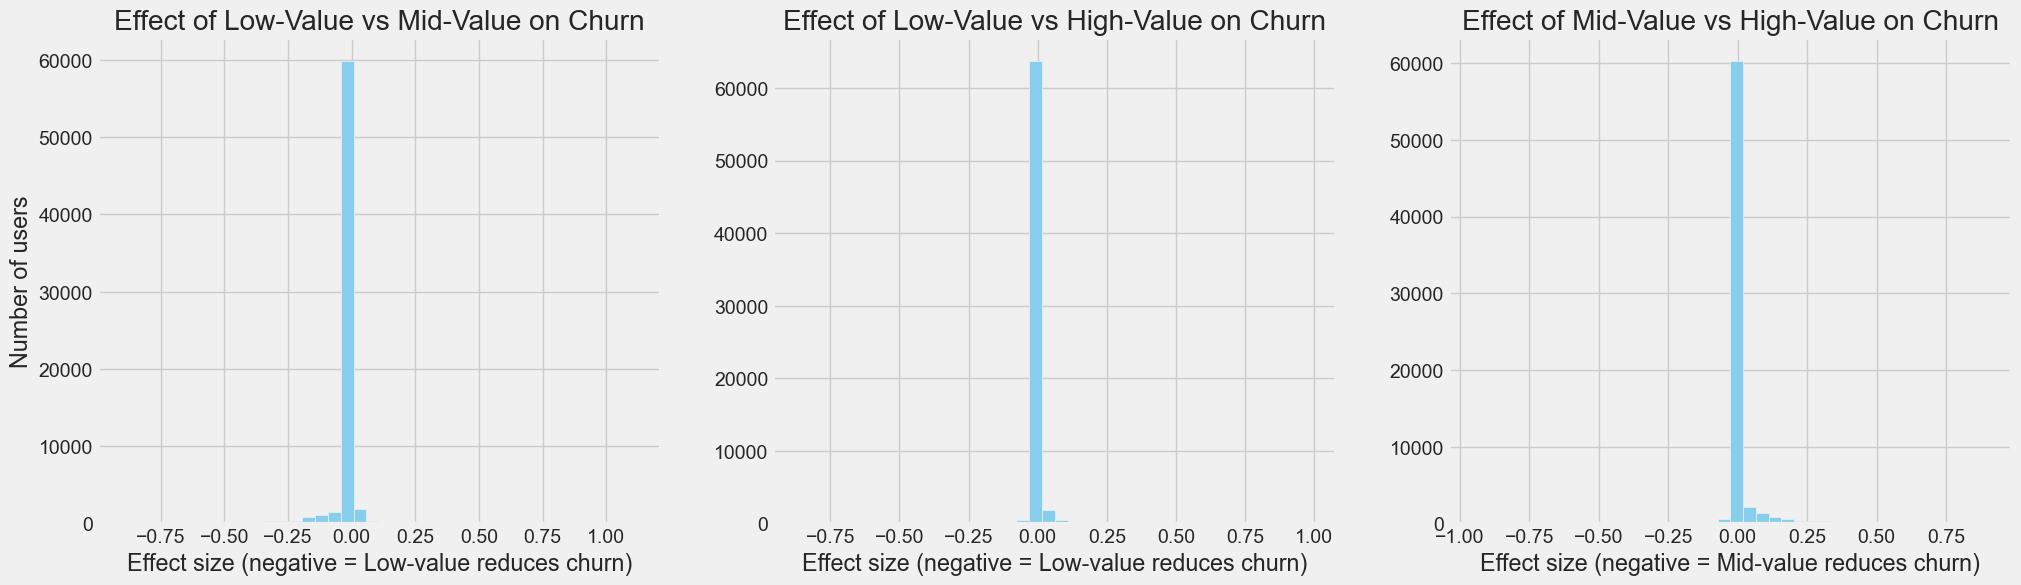

In [124]:
top_positive = df.sort_values('estimated_treatment_effect', ascending=False).head(10)
print(top_positive[['Capstone_id', 'estimated_treatment_effect', 'churned']])

plt.figure(figsize=(22,6))
plt.subplot(1,3,1)
plt.hist(df['low_vs_mid_effect'], bins=40, color='skyblue')
plt.title("Effect of Low-Value vs Mid-Value on Churn")
plt.xlabel("Effect size (negative = Low-value reduces churn)")
plt.ylabel("Number of users")

plt.subplot(1,3,2)
plt.hist(df['low_vs_high_effect'], bins=40, color='skyblue')
plt.title("Effect of Low-Value vs High-Value on Churn")
plt.xlabel("Effect size (negative = Low-value reduces churn)")
plt.ylabel("")

plt.subplot(1,3,3)
plt.hist(df['mid_vs_high_effect'], bins=40, color='skyblue')
plt.title("Effect of Mid-Value vs High-Value on Churn")
plt.xlabel("Effect size (negative = Mid-value reduces churn)")
plt.ylabel("")
plt.show()

In [ ]:
from scipy.stats import skew

print("Skew of Low vs High:", skew(df['low_vs_high_effect'])) # pos->right tail, high-value reduces churn
print("Skew of Mid vs High:", skew(df['mid_vs_high_effect']))

Skew of Low vs High: 2.325235849164632
Skew of Mid vs High: 2.649578509880314


**Conclusion:**
* Low-Value vs Mid-Value on Churn: 
    * Most of the distribution is slightly left of zero.
    * Suggests that Low-Value users churn less than Mid-Value users, all else being equal.
    * Average treatment effect (ATE) is likely slightly negative, meaning the Mid-value segment contains unstable users — worth reviewing their composition (e.g., spiky activity or low loyalty signals).
* Low-Value vs High-Value & Mid-Value vs High-Value on Churn
    * Slightly right skewed.
    * Higher value reduced churn.

### DoWhy
* Treatment (T): pick one segment comparison first
* Outcome (Y): churned
* Common Causes (X): other variables like Age, Income, monetary_1, etc.
#### Low vs non-low

In [ ]:
import pandas as pd

# Binary treatment:
df['segment_1'] = (df['segment'] == 1).astype(int)
df['segment_2'] = (df['segment'] == 2).astype(int)
df['segment_3'] = (df['segment'] == 3).astype(int)
T = 'segment_1'
Y = 'churned'

# Choose features as common causes (avoid leakage)
common_causes = ['recency', 'frequency', 'monetary_1', 'Age', 'Income', 
                 'RESUBSCRIBER', 'multi_sub', 'Gender']

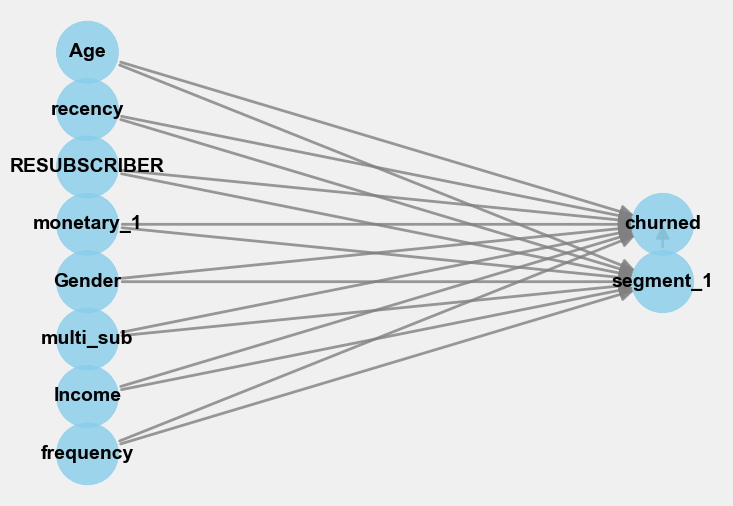

In [138]:
import dowhy
from dowhy import CausalModel

model = CausalModel(
    data=df,
    treatment='segment_1',
    outcome='churned',
    common_causes=common_causes
)

model.view_model()
plt.show();

In [139]:
identified_model = model.identify_effect()
estimate = model.estimate_effect(
    identified_model, 
    method_name="backdoor.propensity_score_matching"
    )
print("Causal effect of being in Segment 1 vs not:", estimate.value)

Causal effect of being in Segment 1 vs not: 0.05205560485063588


**Note:**
If estimate.value is negative, being in Segment 1 reduces churn

**Conclusion:**
Non-low segement reduces churn.

In [140]:
refutation = model.refute_estimate(
    identified_model,
    estimate,
    method_name="placebo_treatment_refuter"
)
print(refutation)

Refute: Use a Placebo Treatment
Estimated effect:0.05205560485063588
New effect:-0.0002519964507542148
p value:0.94



**Note:**
Refute using a Placebo Treatment = “Replace the real treatment (segment_1) with a fake/randomized treatment and re-estimate the effect.”
* If the model is picking up real causal signals, the placebo should give a near-zero effect.

**Conclusion:**
* Original effect: 0.052 - Being in low-value segment increases churn by ~5.2 percentage points
* Placebo effect: ~0 - placebo has no real effect, as expected
* p-value: 0.94 - There is a 94% chance the original effect could have occurred even with no real treatment effect.

The model did not pass the placebo refutation test that our original estimate might be due to random noise or residual confounding and causal effect not robust under this test. Same results from the following two cases.

#### Mid vs non-mid

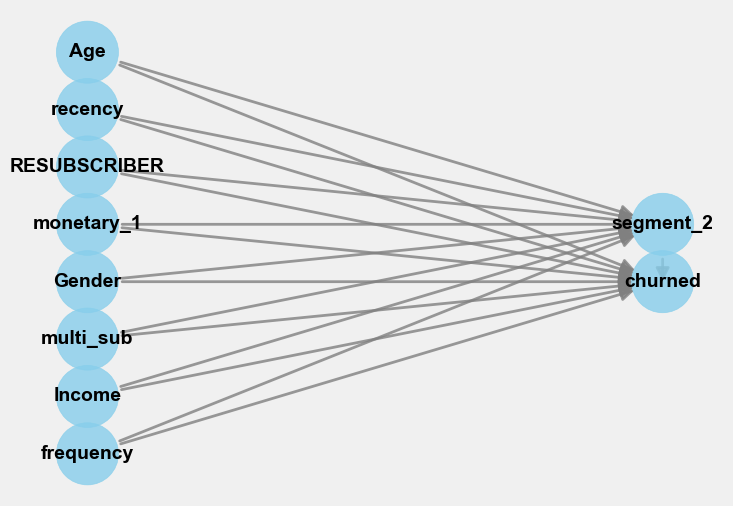

In [141]:
T = 'segment_2'

model = CausalModel(
    data=df,
    treatment='segment_2',
    outcome='churned',
    common_causes=common_causes
)

model.view_model()
plt.show();

In [142]:
identified_model = model.identify_effect()
estimate = model.estimate_effect(
    identified_model, 
    method_name="backdoor.propensity_score_matching"
    )
print("Causal effect of being in Segment 2 vs not:", estimate.value)

Causal effect of being in Segment 2 vs not: -0.43151434486838214


In [143]:
refutation = model.refute_estimate(
    identified_model,
    estimate,
    method_name="placebo_treatment_refuter"
)
print(refutation)

Refute: Use a Placebo Treatment
Estimated effect:-0.43151434486838214
New effect:-0.0003559597752144336
p value:0.89



#### High vs non-high

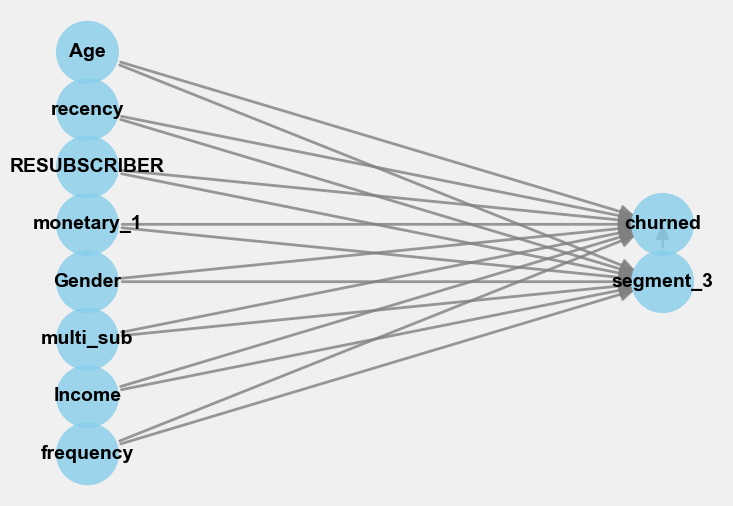

In [144]:
T = 'segment_3'

model = CausalModel(
    data=df,
    treatment='segment_3',
    outcome='churned',
    common_causes=common_causes
)

model.view_model()
plt.show();

In [145]:
identified_model = model.identify_effect()
estimate = model.estimate_effect(
    identified_model, 
    method_name="backdoor.propensity_score_matching"
    )
print("Causal effect of being in Segment 3 vs not:", estimate.value)

Causal effect of being in Segment 3 vs not: 0.27800946465542736


In [146]:
refutation = model.refute_estimate(
    identified_model,
    estimate,
    method_name="placebo_treatment_refuter"
)
print(refutation)

Refute: Use a Placebo Treatment
Estimated effect:0.27800946465542736
New effect:0.0004588879029872818
p value:0.8

